In [1]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold , cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score ,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler ,StandardScaler ,RobustScaler
from sklearn.feature_selection import f_classif
import os

import pandas as pd
import numpy as np #ß

import seaborn as sns
import matplotlib.pyplot as plt


def Normalize_dictionaries(sorted_importances_lg):
    # Calculate the total sum of all feature importances
    total_importance = sum(sorted_importances_lg.values())

    # Normalize each feature's importance by dividing it by the total importance
    return {k: v/total_importance for k, v in sorted_importances_lg.items()}





I need python version 3.9.17 in order to run 
import pymssql

In [2]:
# from Preprocessing_Application import DataPreprocessor

# server = 'reporting-db.nystartfinans.net'
# database = 'reporting-db'
# username = 'Andreas'
# password = 'nCq8Sg@1lYnd(E'

# path = "/Users/andreasnilsson/Desktop/Repository Homes/data-behaviour-scorecard/1. Data/1. BSD.sql"

# preprocessor = DataPreprocessor(server, database, username, password) 


# df = preprocessor.fetch_data_from_sql(path)


In [3]:
df = pd.read_csv('BSC_Today.csv')

In [4]:
# df.to_csv('BSC_raw.csv', index=False)

# # Read the CSV file.
#df = pd.read_csv('BSC_raw.csv', skiprows=0)

In [5]:
pd.set_option('display.max_columns', None)

df = df.sort_values(by=['AccountNumber','MOB'])
df =df[ (df.DisbursedDate >= '2018-01-01') & (df.DisbursedDate <= '2022-07-01') ]

#df =df[df.MOB < 20]

In [6]:
df[df.AccountNumber == 5000179].tail(60)  ## main deliqent 7123433 

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass


## Filter away Main Applicant if we have CO

In [7]:
COCO_acn = df[df.CoappFlag== 1].AccountNumber.drop_duplicates() 

COCO_acn

5640      5028501
413500    5043005
113556    5049333
32565     5051966
316855    5055215
           ...   
437819    7770472
401630    7770704
561444    7770720
237741    7770779
663508    7772395
Name: AccountNumber, Length: 2998, dtype: int64

In [8]:
allCOCO = df[df.AccountNumber.isin(COCO_acn)]
onlyMAIN = df[~df['AccountNumber'].isin(COCO_acn)]


In [9]:
onlyCOCO = allCOCO[allCOCO.CoappFlag == 1].copy()

In [10]:
onlyCOCO[onlyCOCO.Ever90 == 1]

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass
319709,2021-05-31,1,5055215,OPEN,133092.53,38,2018-03-29,106,1,0,1,12BF97F998B6E33FA27D3C37BC2581C75CAD142871A957...,4,0,37.0,7.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,39.0,39.0,39.0,39.0,39.0,133092.53,133092.53,133092.53,133092.53,133092.53,100.0,E8
274320,2021-06-30,1,5055215,FROZEN,133092.53,39,2018-03-29,105,1,0,1,12BF97F998B6E33FA27D3C37BC2581C75CAD142871A957...,9,0,67.0,37.0,17.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,40.0,40.0,40.0,40.0,40.0,133092.53,133092.53,133092.53,133092.53,133092.53,100.0,E8
283255,2021-07-31,1,5055215,FROZEN,133092.53,40,2018-03-29,105,1,0,1,12BF97F998B6E33FA27D3C37BC2581C75CAD142871A957...,9,0,98.0,68.0,48.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,41.0,41.0,41.0,41.0,41.0,133092.53,133092.53,133092.53,133092.53,133092.53,100.0,E8
323247,2021-08-31,1,5055215,FROZEN,133092.53,41,2018-03-29,105,1,0,1,12BF97F998B6E33FA27D3C37BC2581C75CAD142871A957...,9,0,129.0,99.0,79.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,42.0,42.0,42.0,42.0,42.0,133092.53,133092.53,133092.53,133092.53,133092.53,100.0,E8
270879,2021-09-30,1,5055215,FROZEN,133092.53,42,2018-03-29,105,1,0,1,12BF97F998B6E33FA27D3C37BC2581C75CAD142871A957...,9,0,159.0,129.0,109.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,43.0,43.0,43.0,43.0,43.0,133092.53,133092.53,133092.53,133092.53,133092.53,100.0,E8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70691,2023-11-30,1,7756042,CLOSED,0.00,18,2022-05-25,144,1,0,1,A17CAFE7F4DE30D33AFB03523D08853D1ACE3303E18A65...,9,0,219.0,189.0,168.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,19.0,19.0,19.0,19.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN
72256,2023-12-31,1,7756042,CLOSED,0.00,19,2022-05-25,144,1,0,1,A17CAFE7F4DE30D33AFB03523D08853D1ACE3303E18A65...,9,0,250.0,220.0,199.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20.0,20.0,20.0,20.0,20.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN
251136,2023-12-31,1,7762768,OPEN,96015.23,18,2022-06-10,161,1,0,1,449485FDEB4731D11889A34DA6D9B084318C780A1718C5...,4,0,36.0,6.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,19.0,19.0,19.0,NaN,NaN,96015.23,96015.23,96015.23,NaN,NaN,100.0,E8
592088,2023-11-30,1,7766561,OPEN,397311.55,17,2022-06-22,163,1,0,1,EA029F6BA25FFCEED4F247E9CCEA8EF6B2DC82C19A8400...,4,0,36.0,5.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,0,1,

In [11]:
onlyCOCO[onlyCOCO.AccountNumber == 5000179].tail(60) 

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass


In [12]:
onlyCOCO

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass
5640,2018-06-30,1,5028501,OPEN,139728.00,0,2018-06-11,119,1,1,0,4630D9747076AA0362694C940D43921CF482419CB0BB82...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.335849,N1
5747,2018-07-31,1,5028501,OPEN,139208.97,1,2018-06-11,118,1,1,0,4630D9747076AA0362694C940D43921CF482419CB0BB82...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.335849,N1
6983,2018-08-31,1,5028501,OPEN,138683.49,2,2018-06-11,117,1,1,0,4630D9747076AA0362694C940D43921CF482419CB0BB82...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.335849,N1
5910,2018-09-30,1,5028501,OPEN,138151.49,3,2018-06-11,116,1,1,0,4630D9747076AA0362694C940D43921CF482419CB0BB82...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.877308,E3
3453,2018-10-31,1,5028501,OPEN,137612.88,4,2018-06-11,115,1,1,0,4630D9747076AA0362694C940D43921CF482419CB0BB82...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.877308,E3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681673,2023-08-31,1,7772395,OPEN,210823.61,14,2022-06-30,70,1,0,1,6B5C0E13C7E67E2395BE076DE07E43E3A995923436F480...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.877308,E3
673745,2023-09-30,1,7772395,OPEN,209236.49,15,2022-06-30,69,1,0,1,6B5C0E13C7E67E2395BE076DE07E43E3A995923436F480...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.877308,E3
678767,2023-10-31,1,7772395,OPEN,207622.32,16,2022-06-30,68,1,0,1,6B5C0E13C7E67E2395BE076DE07E43E3A995923436F480...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.877308,E3
677263,2023-11-30,1,7772395,OPEN,205980.64,17,2022-06-30,67,1,0,1,6B5C0E13C7E67E2395BE076DE07E43E3A995923436F480...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.877308,E3


In [13]:
onlyMAIN

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass
337727,2018-05-31,1,5020169,OPEN,129579.00,0,2018-05-29,144,0,0,1,3A3AAA5759CFBD8C6CA3F3FE67D4B9C4ED5B0D3C0FE046...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.227063,N1
342752,2018-06-30,1,5020169,OPEN,129308.00,1,2018-05-29,143,0,0,1,3A3AAA5759CFBD8C6CA3F3FE67D4B9C4ED5B0D3C0FE046...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.227063,N1
337329,2018-07-31,1,5020169,OPEN,129022.93,2,2018-05-29,142,0,0,1,3A3AAA5759CFBD8C6CA3F3FE67D4B9C4ED5B0D3C0FE046...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.227063,N1
347568,2018-08-31,1,5020169,CLOSED,0.00,3,2018-05-29,142,0,0,1,3A3AAA5759CFBD8C6CA3F3FE67D4B9C4ED5B0D3C0FE046...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353864,2018-09-30,1,5020169,CLOSED,0.00,4,2018-05-29,142,0,0,1,3A3AAA5759CFBD8C6CA3F3FE67D4B9C4ED5B0D3C0FE046...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369970,2023-08-31,1,7773153,OPEN,3501.97,13,2022-07-01,166,0,0,1,A2A0315699BAB01D06F9B0ED6AFA88B195359F222CBF5C...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,17.0,NaN,NaN,NaN,NaN,3498.11,NaN,NaN,NaN,NaN,4.595843,E4
378910,2023-09-30,1,7773153,OPEN,3498.13,14,2022-07-01,1,0,0,1,A2A0315699BAB01D06F9B0ED6AFA88B195359F222CBF5C...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,17.0,NaN,NaN,NaN,NaN,3498.11,NaN,NaN,NaN,NaN,4.595843,E4
369927,2023-10-31,1,7773153,OPEN,3498.13,15,2022-07-01,0,0,0,1,A2A0315699BAB01D06F9B0ED6AFA88B195359F222CBF5C...,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,17.0,NaN,NaN,NaN,NaN,3498.11,NaN,NaN,NaN,NaN,27.662599,E5
379350,2023-11-30,1,7773153,OPEN,3498.11,16,2022-07-01,3,0,0,1,A2A0315699BAB01D06F9B0ED6AFA88B195359F222CBF5C...,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,17.0,NaN,NaN,NaN,NaN,3498.11,NaN,NaN,NaN,NaN,27.662599,E5


In [14]:
cleanAccounts = pd.concat((onlyMAIN,onlyCOCO))

## Add NEW SCORE

In [15]:
# # Read the CSV file.
AccountScore = pd.read_csv('NewScoreTape.csv', skiprows=0)
AccountScore =  AccountScore[['AccountNumber','P_calibrated']].drop_duplicates()

In [16]:
AccountScore

,AccountNumber,P_calibrated
0,5020169,0.052000
1,5027321,0.096607
2,5027669,0.028300
3,5028501,0.028470
4,5043005,0.152784
...,...,...
12646,7982291,0.080156
12647,7982648,0.027150
12648,7982663,0.061858
12649,7983364,0.126410


In [17]:
withScore =  pd.merge(cleanAccounts,AccountScore , on= 'AccountNumber')

In [18]:
withScore[withScore.Ever90 == 1]

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass,P_calibrated
404,2022-11-30,1,5059563,OPEN,19379.10,57,2018-02-07,2,0,1,0,86B1FC63708BAFA4030CDC428D882A5355FD89F8079295...,4,0,37.0,6.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,58.0,58.0,NaN,NaN,NaN,16228.41,16228.41,NaN,NaN,NaN,100.000000,E8,0.051374
405,2022-12-31,1,5059563,OPEN,9836.97,58,2018-02-07,1,0,1,0,86B1FC63708BAFA4030CDC428D882A5355FD89F8079295...,2,0,0.0,3.0,31.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,59.0,NaN,NaN,NaN,NaN,9836.97,NaN,NaN,NaN,NaN,63.410000,E6,0.051374
406,2023-01-31,1,5059563,OPEN,6594.33,59,2018-02-07,0,0,1,0,86B1FC63708BAFA4030CDC428D882A5355FD89F8079295...,2,0,0.0,34.0,62.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,60.0,NaN,NaN,NaN,NaN,6594.33,NaN,NaN,NaN,NaN,63.410000,E6,0.051374
407,2023-02-28,1,5059563,OPEN,6594.33,60,2018-02-07,0,0,1,0,86B1FC63708BAFA4030CDC428D882A5355FD89F8079295...,2,0,0.0,62.0,90.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,61.0,NaN,NaN,NaN,NaN,6594.33,NaN,NaN,NaN,NaN,63.410000,E6,0.051374
408,2023-03-31,1,5059563,OPEN,3316.49,61,2018-02-07,0,0,1,0,86B1FC63708BAFA4030CDC428D882A5355FD89F8079295...,1,0,23.0,93.0,121.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.752084,E5,0.051374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374576,2023-11-30,1,7756042,CLOSED,0.00,18,2022-05-25,144,1,0,1,A17CAFE7F4DE30D33AFB03523D08853D1ACE3303E18A65...,9,0,219.0,189.0,168.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,19.0,19.0,19.0,19.0,0.00,0.00,0.00,0.00,0.0,NaN,NaN,0.125077
374577,2023-12-31,1,7756042,CLOSED,0.00,19,2022-05-25,144,1,0,1,A17CAFE7F4DE30D33AFB03523D08853D1ACE3303E18A65...,9,0,250.0,220.0,199.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20.0,20.0,20.0,20.0,20.0,0.00,0.00,0.00,0.00,0.0,NaN,NaN,0.125077
375119,2023-12-31,1,7762768,OPEN,96015.23,18,2022-06-10,161,1,0,1,449485FDEB4731D11889A34DA6D9B084318C780A1718C5...,4,0,36.0,6.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,19.0,19.0,19.0,NaN,NaN,96015.23,96015.23,96015.23,NaN,NaN,100.000000,E8,0.081261
375346,2023-11-30,1,7766561,OPEN,397311.55,17,2022-06-22,163,1,0,1,EA029F6BA25FFCEED4F247E9CCEA8EF6B2DC82C19A8400...,4,0,36.0,5.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,0,18.0,18.0,18.0,18.0,NaN,397311.55,397311.55,397311.55,39

In [19]:
min(withScore.DisbursedDate)

'2018-01-02'

In [20]:
withScore = withScore[withScore.MOB > 2]

toKeep = withScore[['AccountNumber','SnapshotDate','MOB','DisbursedDate','Ever90','CoappFlag','TimeSince30'	,'TimeSince60','Ever30In6Months','Ever30In12Months','Ever30','Ever60In6Months','Ever60In12Months','Ever60',
                    
                 	
                    
'P_calibrated' 

,'WorstDelinquency6M',	'WorstDelinquency12M',	'WorstDelinquency','CurrentDelinquencyStatus', 'Score' 
                    ]]

toKeep.loc[toKeep['TimeSince30'].isna(), 'TimeSince30'] = 0
toKeep.loc[toKeep['TimeSince60'].isna(), 'TimeSince60'] = 0

## 'AccountNumber','MOB',   ,'WorstDelinquency6M',	'WorstDelinquency12M',	'WorstDelinquency',   ,'Ever30After48Months','Ever60After48Months' 'Ever30After12Months'	,'Ever60After12Months','Ever30After24Months',	'Ever60After24Months','Ever30After36Months','Ever60After36Months'

In [21]:
toKeep[toKeep.AccountNumber == 7143480   ]  # 5513502 5544507

,AccountNumber,SnapshotDate,MOB,DisbursedDate,Ever90,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score
97517,7143480,2020-06-30,3,2020-03-05,0,0,0.0,0.0,0,0,0,0,0,0,0.033988,0,0,0,0,NaN
97518,7143480,2020-07-31,4,2020-03-05,0,0,0.0,0.0,0,0,0,0,0,0,0.033988,0,0,0,0,NaN
97519,7143480,2020-08-31,5,2020-03-05,0,0,0.0,0.0,0,0,0,0,0,0,0.033988,0,0,0,0,NaN
97520,7143480,2020-09-30,6,2020-03-05,0,0,0.0,0.0,0,0,0,0,0,0,0.033988,0,0,0,0,NaN
97521,7143480,2020-10-31,7,2020-03-05,0,0,0.0,0.0,0,0,0,0,0,0,0.033988,0,0,0,0,NaN
97522,7143480,2020-11-30,8,2020-03-05,0,0,0.0,0.0,0,0,0,0,0,0,0.033988,0,0,0,0,NaN
97523,7143480,2020-12-31,9,2020-03-05,0,0,0.0,0.0,0,0,0,0,0,0,0.033988,0,0,0,0,NaN
97524,7143480,2021-01-31,10,2020-03-05,0,0,0.0,0.0,0,0,0,0,0,0,0.033988,0,0,0,0,NaN
97525,7143480,2021-02-28,11,2020-03-05,0,0,0.0,0.0,0,0,0,0,0,0,0.033988,0,0,0,0,NaN
97526,7143480,2021-03-31,12,2020-03-05,0,0,0.0,0.0,0,0,0,0,0,0,0.033988,0,0,0,0,NaN


In [22]:
AccountNR = 7746910


def runAccount(toKeep,AccountNR):

    account = toKeep[toKeep.AccountNumber == AccountNR ]

    if len(account[account.Ever90 == 0]) == 0:
        return

    healthy = account[account.Ever90 == 0]

    for i in range(100):

        print(i)

        randomhealthyMOB =   healthy.MOB.sample().values[0]
        randomhealthyMOB_P12 = randomhealthyMOB+12

        inputRow = healthy[healthy.MOB == randomhealthyMOB]

        if len(account[account.MOB == randomhealthyMOB_P12]) == 1:
            #print('ja')
            break


    inputRow =  inputRow.drop(columns='Ever90')

    inputRow['Ever90_12M'] = account[account.MOB == randomhealthyMOB_P12].Ever90.iloc[0]

    return inputRow


In [23]:
AccountNR = 7746910




runAccount(toKeep,AccountNR)

0


,AccountNumber,SnapshotDate,MOB,DisbursedDate,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
234273,7746910,2022-11-30,5,2022-06-14,0,0.0,0.0,0,0,0,0,0,0,0.284796,1,1,1,1,27.662599,1


In [24]:
data = pd.DataFrame()

for AccountNR in  set(withScore.AccountNumber):
    print(AccountNR)
    data = pd.concat([data,  runAccount(toKeep,AccountNR)])

7733249
0
1
2
7241730
0
1
2
7274509
0
7700495
0
1
7733264
0
1
5079058
0
7700503
0
7733272
0
1
2
3
4
5
6
7
8
9
10
7766041
0
1
2
3
4
5
6
7
5799960
0
5505052
0
7274525
0
5767199
0
7733280
0
1
7143456
0
1
5341219
0
1
7143472
0
7143480
0
7405624
0
5799994
0
7274558
0
1
5308481
0
7700545
0
1
2
3
7176258
0
1
2
3
4
7176266
0
1
2
7766090
0
7274574
0
5242961
0
5898325
0
1
7143514
0
1
2
7766108
0
5668959
0
7176290
0
7700578
0
5275748
0
5308515
0
5472360
0
5636204
0
7766124
0
7700610
0
7274632
0
5079181
0
7766157
0
1
2
7176340
0
5210265
0
5308572
0
7733405
0
7241888
0
7176357
0
5439658
0
1
7143597
0
5931183
0
7536824
0
1
2
7176381
0
1
7241920
0
1
7733447
0
1
2
7274699
0
7274707
0
7110869
0
7733462
0
7241946
0
7274715
0
5767389
0
7733470
0
1
7176415
0
7110885
0
7241961
0
7110893
0
7373038
0
1
7176431
0
7700719
0
1
5275888
0
7110901
0
7405822
0
7766272
0
5341441
0
5374210
0
7536899
0
1
2
3
5538053
0
7110919
0
7766280
0
1
2
7733512
0
1
2
7274772
0
7274780
0
1
7242019
0
7242027
0
5308721
0
7274806
0
5

In [25]:
data[data.Score > -1]

,AccountNumber,SnapshotDate,MOB,DisbursedDate,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
177340,7274509,2022-01-31,7,2021-06-28,0,0.0,0.0,0,0,0,0,0,0,0.169907,0,1,1,0,4.595843,0
214623,7700495,2022-03-31,3,2021-12-16,0,0.0,0.0,0,0,0,0,0,0,0.060270,1,1,1,0,4.595843,0
228443,7733264,2022-08-31,5,2022-03-22,0,0.0,0.0,0,0,0,0,0,0,0.052036,0,0,0,0,3.654435,0
244867,5079058,2019-01-31,12,2018-01-29,1,0.0,0.0,0,0,0,0,0,0,0.090740,1,1,1,0,1.877308,0
214657,7700503,2022-12-31,12,2021-12-15,0,0.0,0.0,1,1,1,0,0,0,0.078135,2,2,2,2,63.410000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156987,7241698,2021-11-30,8,2021-03-23,0,0.0,0.0,0,0,0,0,0,0,0.065376,0,0,0,0,3.654435,0
286887,5668835,2020-07-31,16,2019-03-08,1,7.0,0.0,1,1,1,1,1,1,0.082520,3,3,3,3,64.500000,1
284782,5636071,2019-09-30,6,2019-03-18,1,0.0,0.0,0,0,0,0,0,0,0.052374,1,1,1,0,1.877308,0
114836,7176175,2021-01-31,6,2020-07-03,0,0.0,0.0,0,0,0,0,0,0,0.098295,1,1,1,0,4.595843,0


In [35]:

earlier = data[data.DisbursedDate < '2020-01-01']


np.mean(earlier.MOB)

22.513324450366422

In [29]:
data


data.DisbursedDate

,AccountNumber,SnapshotDate,MOB,DisbursedDate,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
228421,7733249,2022-08-31,5,2022-03-22,0,0.0,0.0,0,0,0,0,0,0,0.061602,1,1,1,0,NaN,0
157025,7241730,2022-03-31,12,2021-03-12,0,0.0,0.0,0,0,0,0,0,0,0.059782,0,1,1,0,NaN,0
177340,7274509,2022-01-31,7,2021-06-28,0,0.0,0.0,0,0,0,0,0,0,0.169907,0,1,1,0,4.595843,0
214623,7700495,2022-03-31,3,2021-12-16,0,0.0,0.0,0,0,0,0,0,0,0.060270,1,1,1,0,4.595843,0
228443,7733264,2022-08-31,5,2022-03-22,0,0.0,0.0,0,0,0,0,0,0,0.052036,0,0,0,0,3.654435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312375,7143407,2021-01-31,10,2020-03-06,1,0.0,0.0,0,0,0,0,0,0,0.047438,1,1,1,0,1.877308,0
29345,5406707,2021-12-31,38,2018-10-11,0,0.0,0.0,0,0,0,0,0,0,0.051629,0,0,1,0,NaN,0
79197,7110646,2022-05-31,30,2019-11-29,0,0.0,0.0,0,0,0,0,0,0,0.045480,0,0,1,0,NaN,0
2769,5079033,2022-04-30,51,2018-01-26,0,0.0,0.0,0,0,0,0,0,0,0.054885,0,1,1,0,NaN,0


In [27]:
import pandas as pd

# Assuming 'toKeep' is your DataFrame
for column in toKeep.columns:
    if toKeep[column].isna().any():
        print(f"Column '{column}' contains NaN values.")


Column 'Score' contains NaN values.


## Filter away MOB < 3 

In [28]:
saved = data.copy()

# Feature Importance


In [29]:
notinlist = ['AccountNumber','DisbursedDate','SnapshotDate','Score','Ever90_12M']  # 'MOB',

X, Y = data.drop(columns=notinlist), data['Ever90_12M']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and testing data
Xtrain = scaler.fit_transform(X)


In [30]:
# ANOVA analysis to perform Feature filter method selection

# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(Xtrain, Y)

# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': data.drop(columns=notinlist).columns.values,
                                     'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})

ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)

# save the top 20 numerical features in a list
top_20_features = ANOVA_F_table.iloc[:20, 0].to_list()

ANOVA_F_table.head(30)

,Numerical_Feature,F-Score,p values
0,CurrentDelinquencyStatus,4219.558346,0.000000
1,Ever30In6Months,2816.033545,0.000000
2,Ever30In12Months,2548.790446,0.000000
3,Ever30,2136.424389,0.000000
4,WorstDelinquency6M,2041.000688,0.000000
5,WorstDelinquency12M,1681.751577,0.000000
6,WorstDelinquency,1198.439926,0.000000
7,Ever60In6Months,1174.988980,0.000000
8,Ever60In12Months,1101.591332,0.000000
9,Ever60,1037.031851,0.000000


## Gradient Boost 

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Best parameters
best_params = {'criterion': 'friedman_mse','learning_rate': 0.05,'max_depth': 15,'max_features': 'log2','min_samples_leaf': 100,'n_estimators': 50,'subsample': 0.6}

bgc_tuned = GradientBoostingClassifier(
    criterion=best_params['criterion'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    n_estimators=best_params.get('n_estimators', 15),  # Default value if not in grid
    subsample=best_params.get('subsample', 1.0)         # Default value if not in grid
)

# train
bgc_tuned.fit(Xtrain, Y)


GradientBoostingClassifier(learning_rate=0.05, max_depth=15,
                           max_features='log2', min_samples_leaf=100,
                           n_estimators=50, subsample=0.6)

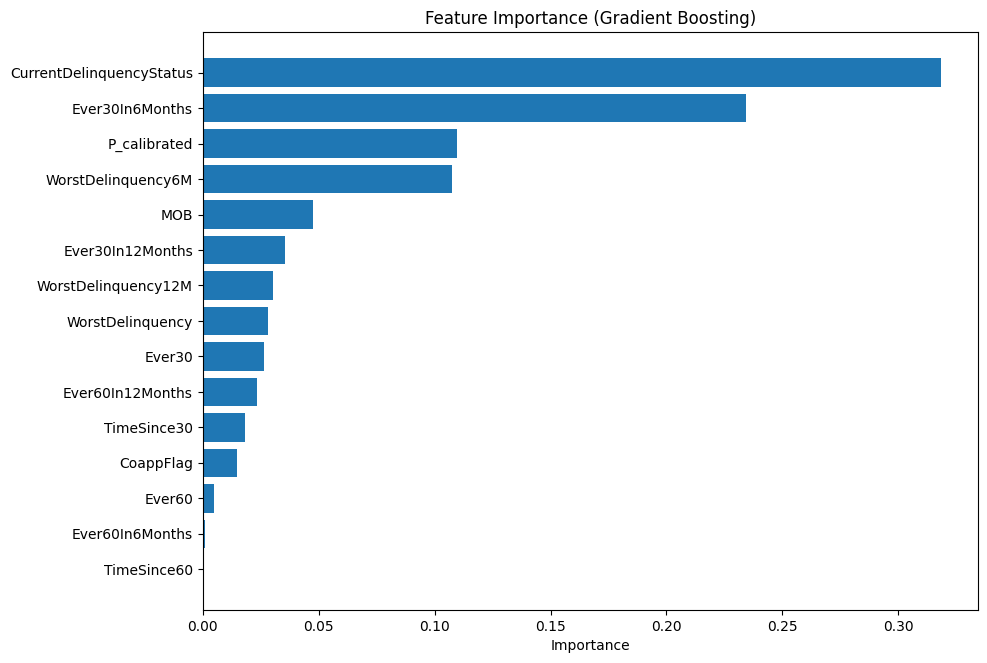

In [32]:

import matplotlib.pyplot as plt
# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = bgc_tuned.feature_importances_


# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = bgc_tuned.feature_importances_

feature_names = X.columns
    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()



# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))



    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()



# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))



# Sorting the dictionary by importances
sorted_importances = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=False)}

sorted_importances_bgc = Normalize_dictionaries(importance_dict)


# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()




In [33]:


sum(sorted_importances_bgc.values())

1.0

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Best parameters
best_params = {'bootstrap': True,'criterion': 'gini','max_depth': 10,'max_features': 6,'min_samples_leaf': 1,'min_samples_split': 30,'n_estimators': 50}

# Create tuned RFC model using best parameters
rfr_tune = RandomForestClassifier(**best_params)
rfr_tune.fit(Xtrain, Y)


RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=30,
                       n_estimators=50)

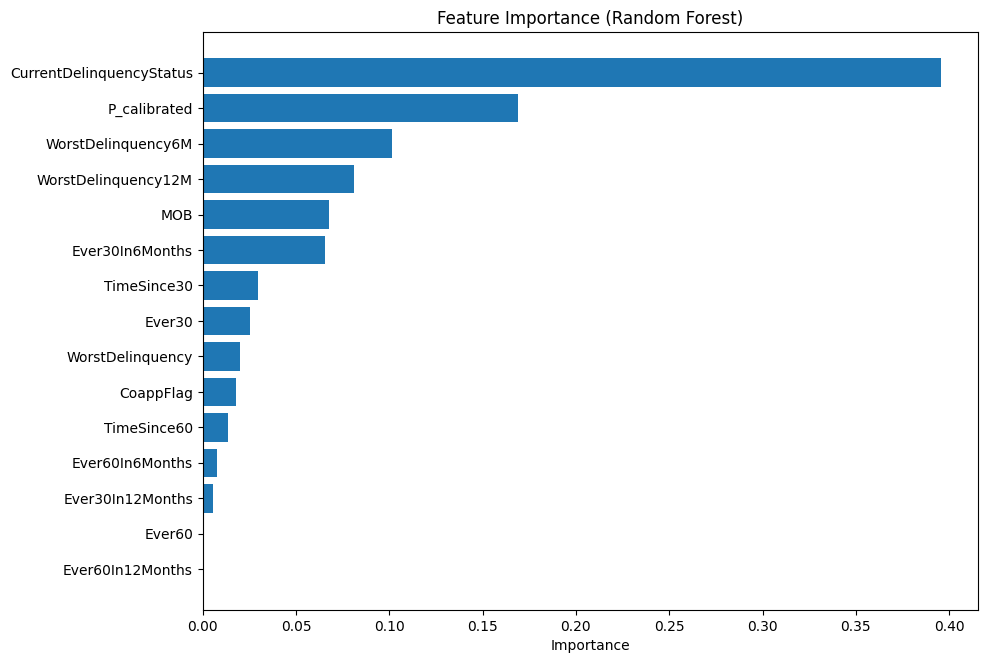

In [35]:

# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = rfr_tune.feature_importances_
    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()


# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))

# Sorting the dictionary by importances
sorted_importances = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=False)}

sorted_importances_rfs = Normalize_dictionaries(importance_dict)


# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming you have your data loaded in Xtrain and Ytrain

# Hyperparameters you've determined
best_params = {'C': 0.001, 'max_iter': 1000000, 'penalty': 'l2', 'solver': 'lbfgs'}

# Create and fit the Logistic Regression model using the best parameters
lr_tuned = LogisticRegression(**best_params)
lr_tuned.fit(Xtrain, Y)

# Cross-validated score (assuming 5-fold cross validation for example)
#CVS_LR_Tuned = cross_val_score(lr_tuned, Xtrain, Ytrain, cv=5)
#print("Cross-validated score for tuned Logistic Regression:", CVS_LR_Tuned.mean())


LogisticRegression(C=0.001, max_iter=1000000)

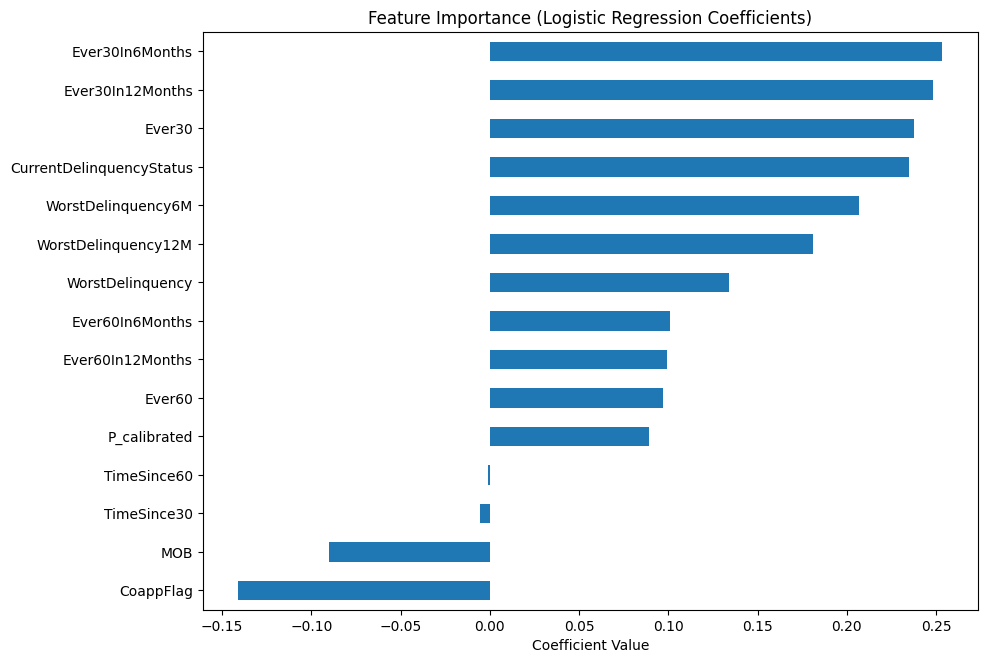

In [37]:
import matplotlib.pyplot as plt

# Retrieve the coefficients from the trained model
coefficients = lr_tuned.coef_[0]

# Assuming X is a pandas DataFrame, retrieve the feature names
#feature_names = test.drop(columns='Ever90').columns

feature_importance = pd.Series(coefficients, index=feature_names).sort_values()

# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
feature_importance.plot(kind='barh')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()




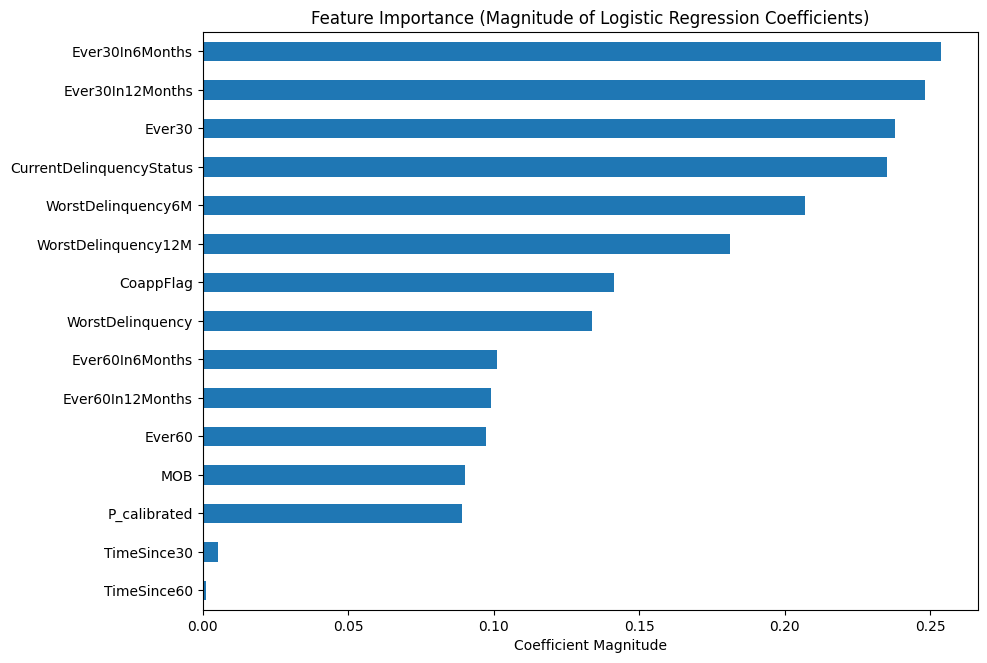

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve the coefficients from the trained model
coefficients = lr_tuned.coef_[0]

# Assuming X is a pandas DataFrame, retrieve the feature names
#feature_names = test.drop(columns='Ever90').columns

# Compute the absolute values of the coefficients to get the magnitude of importance
feature_magnitude = pd.Series(abs(coefficients), index=feature_names)

# Sort by magnitude
sorted_features = feature_magnitude.sort_values(ascending=True)
sorted_importances_lg = Normalize_dictionaries(dict(sorted_features))


# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
sorted_features.plot(kind='barh')
plt.title('Feature Importance (Magnitude of Logistic Regression Coefficients)')
plt.xlabel('Coefficient Magnitude')
plt.show()

In [39]:
# Convert DataFrame to dictionary
sorted_importances_Anova = dict(zip(ANOVA_F_table['Numerical_Feature'], ANOVA_F_table['F-Score']))
sorted_importances_Anova

sorted_importances_Anova = Normalize_dictionaries(sorted_importances_Anova)
sorted_importances_Anova
# Drop 'Age' from all dictionaries

#sorted_importances_dct.pop('AccountNumber', None)
sorted_importances_bgc.pop('AccountNumber', None)
sorted_importances_rfs.pop('AccountNumber', None)
sorted_importances_lg.pop('AccountNumber', None)
sorted_importances_Anova.pop('AccountNumber', None)

# Drop 'Age' from all dictionaries
for i in ['AccountNumber','degenerate_application_id','Gender']:
    

    #sorted_importances_dct.pop(i, None)
    sorted_importances_bgc.pop(i, None)
    sorted_importances_rfs.pop(i, None)
    sorted_importances_lg.pop(i, None)
    sorted_importances_Anova.pop(i, None)



In [40]:
import plotly.graph_objects as go

# ... Your data for sorted_importances_dct, sorted_importances_bgc, etc. ...

# Combining dictionaries
combined_dict = {
    #'DCT': sorted_importances_dct,
    'BGC': sorted_importances_bgc,
    'RFS': sorted_importances_rfs,
    'LG': sorted_importances_lg,
    'ANOVA': sorted_importances_Anova
}

# Calculate cumulative importance for each feature
cumulative_importance = {}
for feature in sorted_importances_bgc.keys():
    cumulative_importance[feature] = sum(d[feature] for d in combined_dict.values())

# Sort features by cumulative importance
sorted_features = sorted(cumulative_importance, key=cumulative_importance.get, reverse=True)

# Plotting the stacked bar chart:
fig = go.Figure()

for method, importances in combined_dict.items():
    values = [importances.get(feature, 0) for feature in sorted_features]
    fig.add_trace(go.Bar(
        x=sorted_features,
        y=values,
        name=method
    ))

fig.update_layout(
    title="Feature Importances by Method",
    barmode='stack',
    xaxis_title="Features",
    yaxis_title="Importance",
    xaxis={'categoryorder':'total descending', 'tickangle': 45}, # Adjust tick angle for better readability
    width=1800,  # Adjust width
    height=800   # Adjust height
)
fig.show()


<Axes: >

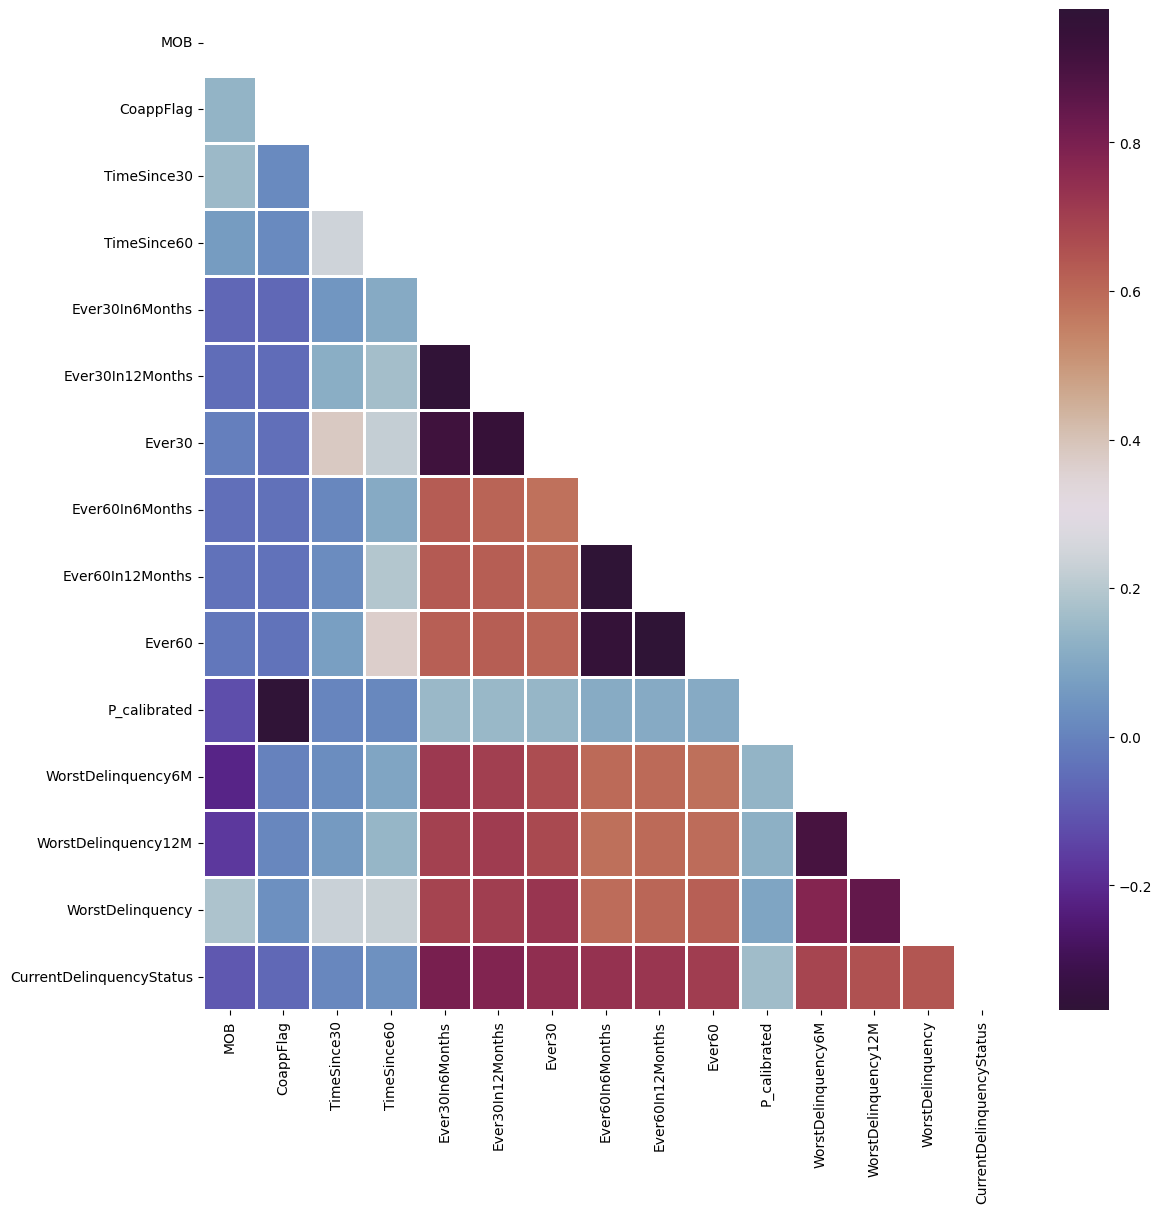

In [43]:
# calculate pair-wise correlations between them
corrmat = X[X.columns].corr()
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(13,13))
sns.heatmap(corrmat, cmap='twilight_shifted', cbar=True, linewidths=1, yticklabels=1  , mask=mask)

In [44]:

correlation_matrix = X[X.columns].corr()

# Identify features that have a correlation greater than 0.8 with another feature
highly_correlated_features = set()

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        # We check if the value is greater than 0.8 and less than 1 
        # because a feature always has a correlation of 1 with itself
        if (correlation_matrix[col][idx] > 0.85 ) and correlation_matrix[col][idx] < 1:  # or correlation_matrix[col][idx] < -0.85
            highly_correlated_features.add(col)
            highly_correlated_features.add(idx)

print(list(highly_correlated_features))


['Ever60In6Months', 'Ever60In12Months', 'Ever60', 'WorstDelinquency12M', 'Ever30', 'WorstDelinquency6M', 'Ever30In12Months', 'Ever30In6Months']


In [45]:
plt.figure(figsize=(12,12))
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corrmat[mask] = np.nan
(corrmat
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .format("{:.2f}"))


,MOB,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus
MOB,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CoappFlag,0.13,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TimeSince30,0.15,0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TimeSince60,0.07,0.02,0.24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30In6Months,-0.07,-0.06,0.05,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30In12Months,-0.05,-0.06,0.12,0.17,0.97,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30,-0.01,-0.05,0.38,0.22,0.92,0.95,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever60In6Months,-0.05,-0.04,0.01,0.11,0.63,0.61,0.58,nan,nan,nan,nan,nan,nan,nan,nan
Ever60In12Months,-0.04,-0.04,0.02,0.19,0.63,0.62,0.59,0.98,nan,nan,nan,nan,nan,nan,nan
Ever60,-0.03,-0.04,0.07,0.37,0.62,0.62,0.61,0.96,0.98,nan,nan,nan,nan,nan,nan


<Figure size 1200x1200 with 0 Axes>

In [46]:
data.to_csv('BSC_mani.csv', index=False)



toKeep

data

In [47]:
data

,AccountNumber,SnapshotDate,MOB,DisbursedDate,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
228424,7733249,2022-11-30,8,2022-03-22,0,0.0,0.0,0,0,0,0,0,0,0.061602,0,1,1,0,NaN,0
157034,7241730,2022-12-31,21,2021-03-12,0,0.0,0.0,0,0,0,0,0,0,0.059782,0,0,1,0,NaN,0
177344,7274509,2022-05-31,11,2021-06-28,0,0.0,0.0,0,0,0,0,0,0,0.169907,0,1,1,0,4.595843,0
214629,7700495,2022-09-30,9,2021-12-16,0,0.0,0.0,0,0,0,0,0,0,0.060270,1,1,1,1,27.662599,0
228444,7733264,2022-09-30,6,2022-03-22,0,0.0,0.0,0,0,0,0,0,0,0.052036,0,0,0,0,3.654435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312375,7143407,2021-01-31,10,2020-03-06,1,0.0,0.0,0,0,0,0,0,0,0.047438,1,1,1,0,1.877308,0
29320,5406707,2019-11-30,13,2018-10-11,0,0.0,0.0,0,0,0,0,0,0,0.051629,1,1,1,0,4.595843,0
79180,7110646,2020-12-31,13,2019-11-29,0,0.0,0.0,0,0,0,0,0,0,0.045480,0,1,1,0,NaN,0
2759,5079033,2021-06-30,41,2018-01-26,0,0.0,0.0,0,0,0,0,0,0,0.054885,1,1,1,1,27.662599,0


In [48]:
data.CurrentDelinquencyStatus.value_counts()

CurrentDelinquencyStatus
0    8206
1     535
2     241
3     199
Name: count, dtype: int64

In [51]:
data[(data.CurrentDelinquencyStatus == 1) & (data.WorstDelinquency6M == 0)]

,AccountNumber,SnapshotDate,MOB,DisbursedDate,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
